In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
df=pd.read_csv("Retail_with_categories.csv")
df.head(3)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Season,Promotion,Unit_Price,Cost_Per_Item,Profit,Customer_ID,Basket_Size,Product_Category,Category,Sub_Category
0,1000000000,21-01-2022 06:27,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,...,Winter,NaN,23.883333,12.236913,34.939260,118350,3,Ketchup,Condiments,Ketchup
1,1000000001,01-03-2023 13:01,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,...,Fall,BOGO (Buy One Get One),12.965000,8.883803,8.162393,322706,5,Ice Cream,Dairy,Ice Cream
2,1000000002,21-03-2024 15:37,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,...,Winter,NaN,6.915000,4.284521,15.782871,864947,1,Spinach,Vegetables,Spinach


In [347]:
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     1000 non-null   int64  
 1   Date               1000 non-null   object 
 2   Customer_Name      1000 non-null   object 
 3   Product            1000 non-null   object 
 4   Total_Items        1000 non-null   int64  
 5   Total_Cost         1000 non-null   float64
 6   Payment_Method     1000 non-null   object 
 7   City               1000 non-null   object 
 8   Store_Type         1000 non-null   object 
 9   Discount_Applied   1000 non-null   bool   
 10  Customer_Category  1000 non-null   object 
 11  Season             1000 non-null   object 
 12  Promotion          643 non-null    object 
 13  Unit_Price         1000 non-null   float64
 14  Cost_Per_Item      1000 non-null   float64
 15  Profit             1000 non-null   float64
 16  Cust

# Data cleaning


In [348]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

Transaction_ID         0
Date                   0
Customer_Name          0
Product                0
Total_Items            0
Total_Cost             0
Payment_Method         0
City                   0
Store_Type             0
Discount_Applied       0
Customer_Category      0
Season                 0
Promotion            357
Unit_Price             0
Cost_Per_Item          0
Profit                 0
Customer_ID            0
Basket_Size            0
Product_Category       0
Category               0
Sub_Category           0
dtype: int64

In [349]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce',dayfirst=True)
df['Date'].head(5)

0   2022-01-21 06:27:00
1   2023-03-01 13:01:00
2   2024-03-21 15:37:00
3   2020-10-31 09:59:00
4   2020-12-10 00:59:00
Name: Date, dtype: datetime64[ns]

# fill missing numeric value with median

In [350]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df['Total_Items'].fillna(df['Total_Items'].median(),inplace=True)
    df['Total_Cost'].fillna(df['Total_Cost'].median(),inplace=True)
    df['Unit_Price'].fillna(df['Unit_Price'].median(),inplace=True)
    df['Cost_Per_Item'].fillna(df['Cost_Per_Item'].median())
    df['Profit'].fillna(df['Profit'].median())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24856\4194638998.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total_Items'].fillna(df['Total_Items'].median(),inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24856\4194638998.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [351]:
df['Profit'].head(5)

0    34.939260
1     8.162393
2    15.782871
3    16.538633
4     9.083452
Name: Profit, dtype: float64

# fill missing categorical value

In [352]:
cat_cols=df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df['Customer_Name'].fillna(df['Customer_Name'].mode()[0],inplace=True)
print("\nAfter cleaning",df.isnull().sum().sum(),"Missing values left")


After cleaning 357 Missing values left


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24856\389953034.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Name'].fillna(df['Customer_Name'].mode()[0],inplace=True)


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction_ID     1000 non-null   int64         
 1   Date               1000 non-null   datetime64[ns]
 2   Customer_Name      1000 non-null   object        
 3   Product            1000 non-null   object        
 4   Total_Items        1000 non-null   int64         
 5   Total_Cost         1000 non-null   float64       
 6   Payment_Method     1000 non-null   object        
 7   City               1000 non-null   object        
 8   Store_Type         1000 non-null   object        
 9   Discount_Applied   1000 non-null   bool          
 10  Customer_Category  1000 non-null   object        
 11  Season             1000 non-null   object        
 12  Promotion          643 non-null    object        
 13  Unit_Price         1000 non-null   float64       
 14  Cost_Per_

In [354]:
df.fillna({
    "Product":
    df['Product'].mode(),
    "Payment_Method":
    df['Payment_Method'].mode(),
    "City":
    df['City'].mode(),
    "Store_Type":
    df['Store_Type'].mode(),
    "Customer_Category":
    df['Customer_Category'].mode(),
    "Season":
    df['Season'].mode(),
    "Promotion":
    df['Promotion'].mode(),
    "Product_Category":
    df['Product_Category'].mode(),
    "Category":
    df['Category'].mode(),
    "Sub_Category":
    df['Sub_Category'].mode()
    },inplace=True)


In [355]:
df.head(2)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Season,Promotion,Unit_Price,Cost_Per_Item,Profit,Customer_ID,Basket_Size,Product_Category,Category,Sub_Category
0,1000000000,2022-01-21 06:27:00,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,...,Winter,BOGO (Buy One Get One),23.883333,12.236913,34.939260,118350,3,Ketchup,Condiments,Ketchup
1,1000000001,2023-03-01 13:01:00,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,...,Fall,BOGO (Buy One Get One),12.965000,8.883803,8.162393,322706,5,Ice Cream,Dairy,Ice Cream


# convert into lowercase column values

In [356]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].str.lower()
    


In [357]:
df.head(2)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,...,Season,Promotion,Unit_Price,Cost_Per_Item,Profit,Customer_ID,Basket_Size,Product_Category,Category,Sub_Category
0,1000000000,2022-01-21 06:27:00,stacey price,"['ketchup', 'shaving cream', 'light bulbs']",3,71.65,mobile payment,los angeles,warehouse club,True,...,winter,bogo (buy one get one),23.883333,12.236913,34.939260,118350,3,ketchup,condiments,ketchup
1,1000000001,2023-03-01 13:01:00,michelle carlson,"['ice cream', 'milk', 'olive oil', 'bread', 'p...",2,25.93,cash,san francisco,specialty store,True,...,fall,bogo (buy one get one),12.965000,8.883803,8.162393,322706,5,ice cream,dairy,ice cream


# clean product table

In [358]:
df['Product']=df['Product'].str.replace(r"[\ [\]']",'',regex=True).str.strip()

In [359]:
df['Product']

0                       ketchup,shavingcream,lightbulbs
1                 icecream,milk,oliveoil,bread,potatoes
2                                               spinach
3                                       tissues,mustard
4                                              dishsoap
                             ...                       
995                               butter,mayonnaise,tea
996                                     insectrepellent
997                                      hairgel,yogurt
998    cleaningrags,cleaningrags,razors,plantfertilizer
999                                     plantfertilizer
Name: Product, Length: 1000, dtype: object

# here i create a function to save plots in to pdf

In [360]:
def save_plot(fig,title,action):
    fig.suptitle(title,fontsize=14,fontweight="bold")
    print("\n")
    fig.text(0.1,0.02,f"Business Actions\n: {action}",fontsize=8,style="italic")
    fig.savefig(f"{title}.pdf", bbox_inches="tight")
    plt.close(fig)

1.LOw margin Product

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24856\3600782652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cost_Per_Item",y="Sub_Category",data=low_margin,palette="coolwarm",ax=ax,legend=False)


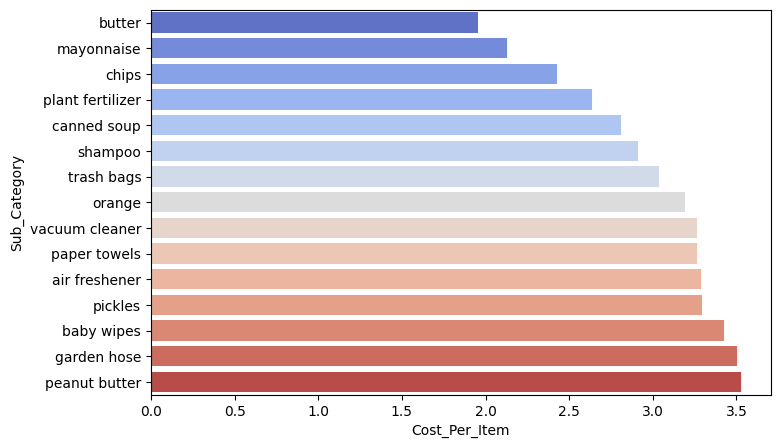

In [361]:
low_margin=df.groupby("Sub_Category").agg({"Total_Items":"sum","Profit":"sum"}).reset_index()
low_margin['Cost_Per_Item']=low_margin['Profit']/low_margin['Total_Items']
low_margin=low_margin.sort_values("Cost_Per_Item").head(15)
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(x="Cost_Per_Item",y="Sub_Category",data=low_margin,palette="coolwarm",ax=ax,legend=False)
plt.show()
save_plot(fig,"low margin products","Increase price or renegotiate supplier cost")

2.Customer Lifetime Value

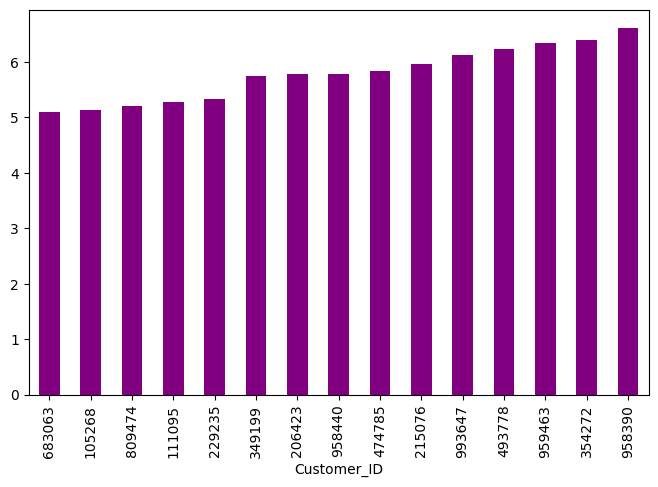

In [362]:
clv=df.groupby("Customer_ID").agg({"Total_Cost":"sum"}).sort_values("Total_Cost").head(15)
fig,ax=plt.subplots(figsize=(8,5))
clv.plot(kind="bar",ax=ax,legend=False,color="Purple")
plt.show()
save_plot(fig,"Top 10 customers","Create loyalty rewards for these customers")

seasonal best sealler

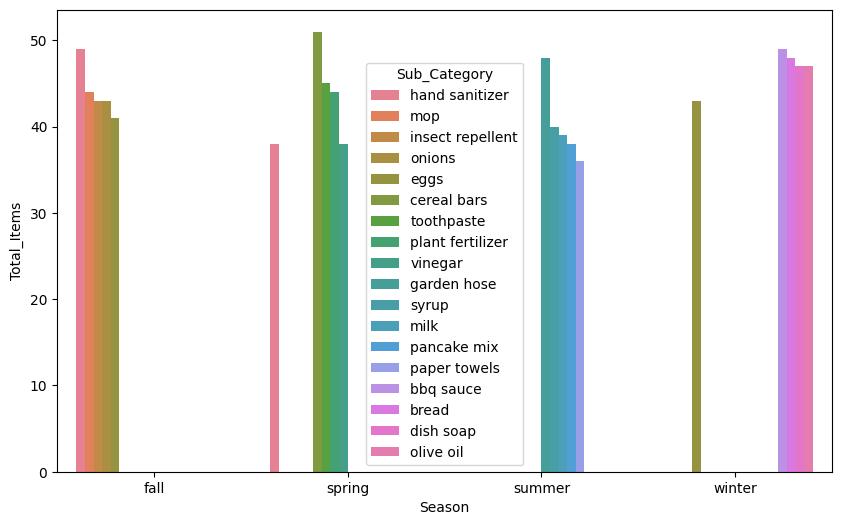

In [363]:
seasonal = df.groupby(["Season", "Sub_Category"])["Total_Items"].sum().reset_index()
TOp_seasonal = seasonal.sort_values(["Season", "Total_Items"], ascending=[True, False]).groupby("Season").head(5)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Season", y="Total_Items", hue="Sub_Category", data=TOp_seasonal, ax=ax)
plt.show()
save_plot(fig, "Best Sealling product per season", "Stoke more of these before season")


4.Slow moving inventry

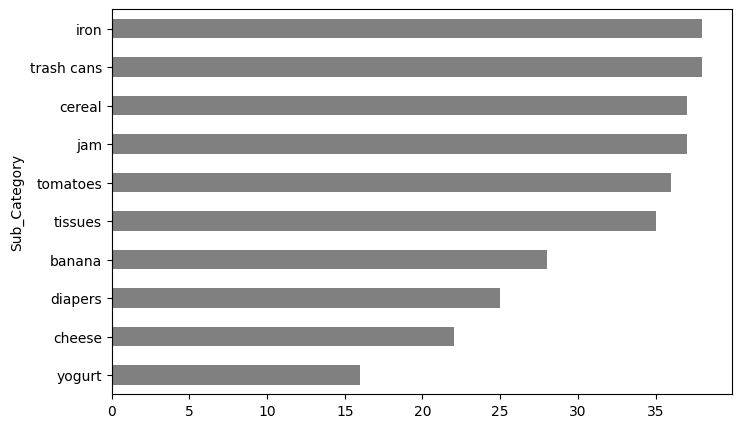

In [364]:
slow=df.groupby("Sub_Category")["Total_Items"].sum().sort_values().head(10)
fig,ax=plt.subplots(figsize=(8,5))
slow.plot(kind="barh",ax=ax,color="gray")
plt.show()
save_plot(fig,"Slow Moving Products","Reduce stock or replace these items")


5.Store Type Profitibility

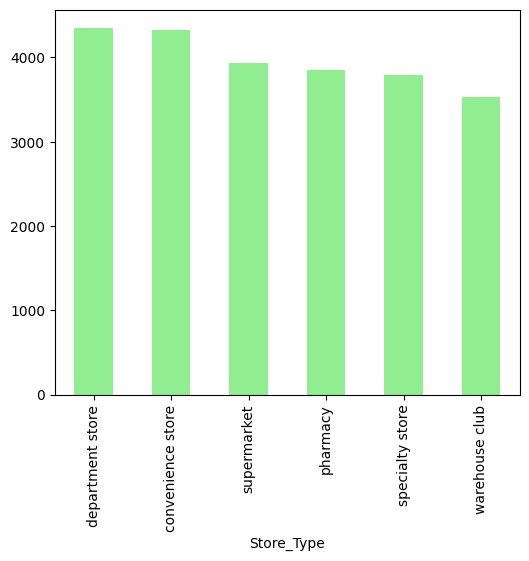

In [365]:
store_profit=df.groupby("Store_Type")["Profit"].sum().sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(6,5))
store_profit.plot(kind="bar",ax=ax,color="lightgreen")
plt.show()
save_plot(fig,"Profit by Store Type","Invest more in high-performing store types")


 6.Payment Methods


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24856\124024726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Method",data=df,order=df["Payment_Method"].value_counts().index, palette="Set2", ax=ax)


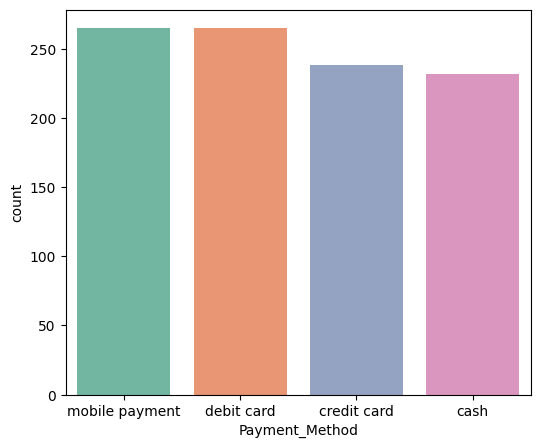

In [366]:
fig,ax=plt.subplots(figsize=(6,5))
sns.countplot(x="Payment_Method",data=df,order=df["Payment_Method"].value_counts().index, palette="Set2", ax=ax)
plt.show()
save_plot(fig, "Payment Preferences","Focus on UPI/credit card offers")




7.City-wise Profit


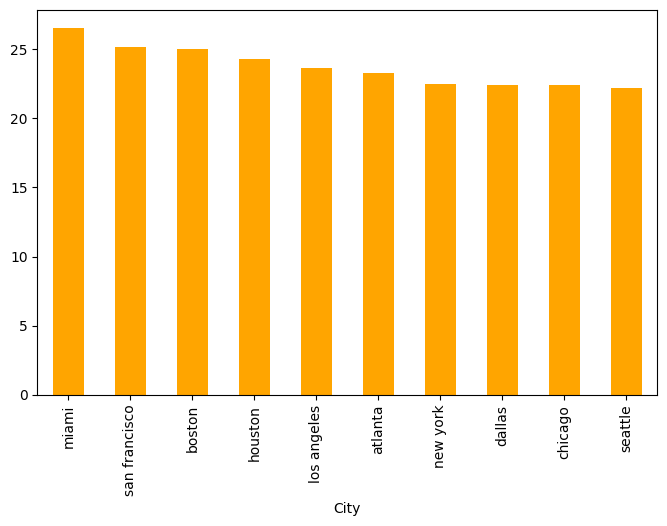

In [367]:
city_profit=df.groupby("City")["Profit"].mean().sort_values(ascending=False).head(10)
fig, ax=plt.subplots(figsize=(8,5))
city_profit.plot(kind="bar",ax=ax,color="orange")
plt.show()
save_plot(fig, "Top Profitable Cities", "Increase marketing in top cities")


8. Promotion Effectiveness


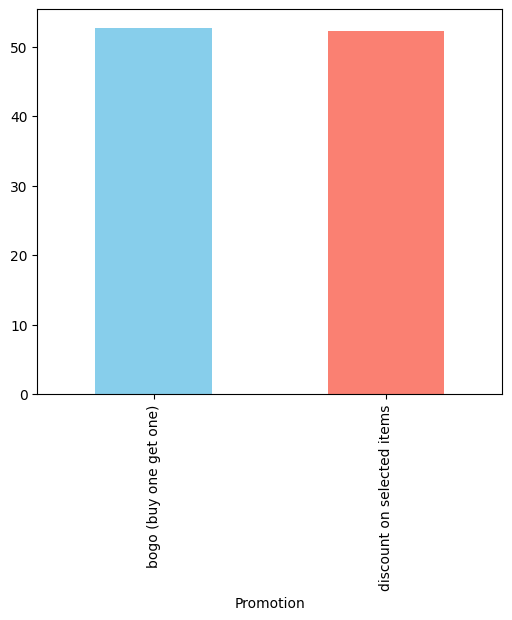

In [368]:
promo=df.groupby("Promotion")["Total_Cost"].mean()
fig,ax=plt.subplots(figsize=(6,5))
promo.plot(kind="bar",ax=ax,color=["skyblue","salmon"])
plt.show()
save_plot(fig, "Promotion Effectiveness","Run targeted instead of blanket promotions")


9. Price Sensitivity


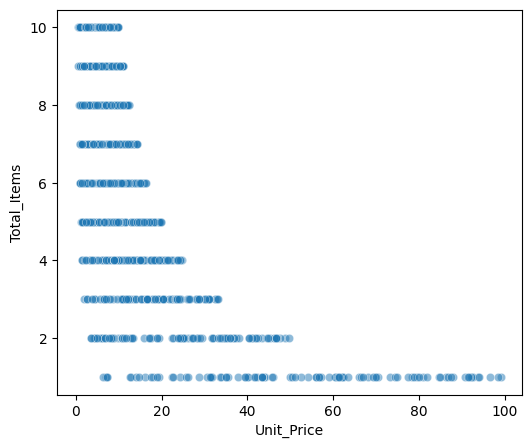

In [369]:
ig,ax=plt.subplots(figsize=(6,5))
sns.scatterplot(x="Unit_Price",y="Total_Items",data=df, alpha=0.5, ax=ax)
plt.show()
save_plot(fig,"Price Sensitivity","Consider dynamic pricing")



10.Customer Retention


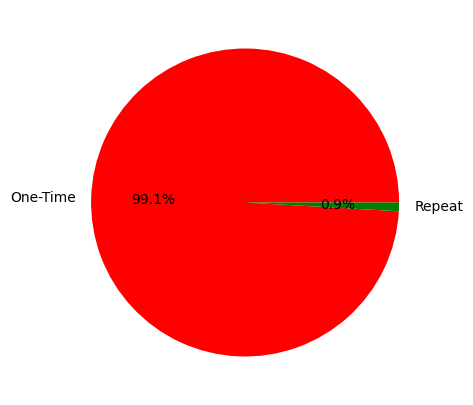

In [370]:
customer_orders=df.groupby("Customer_ID")["Transaction_ID"].nunique()
one_time=(customer_orders==1).sum()
repeat=(customer_orders>1).sum()
fig,ax=plt.subplots(figsize=(6,5))
ax.pie([one_time,repeat], labels=["One-Time","Repeat"],autopct="%1.1f%%",colors=["red","green"])
plt.show()
save_plot(fig,"Customer Retention","Launch retention campaigns for one-time buyers")


11. Peak Sales Hours

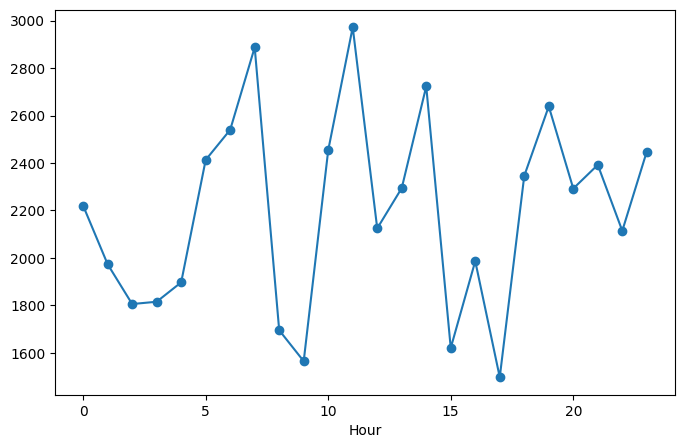

In [371]:
df["Hour"]=df["Date"].dt.hour
sales_by_hour=df.groupby("Hour")["Total_Cost"].sum()
fig, ax=plt.subplots(figsize=(8,5))
sales_by_hour.plot(kind="line",marker="o",ax=ax)
plt.show()
save_plot(fig, "Peak Sales Hours","Schedule staff and promotions at peak hours")


12. Best Selling Days


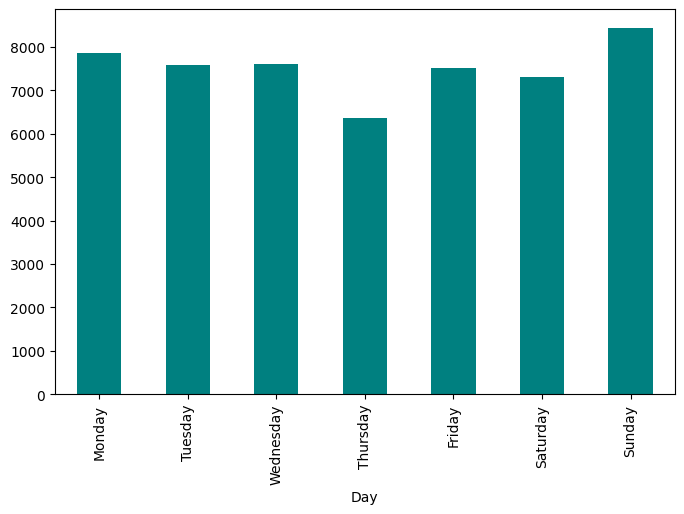

In [372]:
df["Day"]=df["Date"].dt.day_name()
sales_by_day=df.groupby("Day")["Total_Cost"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
fig, ax=plt.subplots(figsize=(8,5))
sales_by_day.plot(kind="bar",ax=ax,color="teal")
plt.show()
save_plot(fig,"Best Selling Days","Run weekend offers and stock more")


13. Basket Size


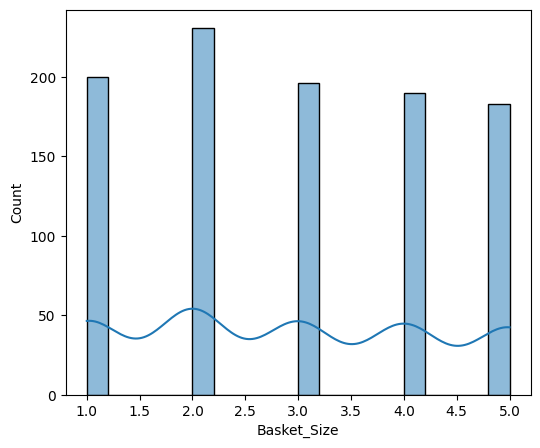

In [373]:
ig, ax=plt.subplots(figsize=(6,5))
sns.histplot(df["Basket_Size"],bins=20,kde=True,ax=ax)
plt.show()
save_plot(fig,"Basket Size Distribution", "Cross-sell when basket size is high")


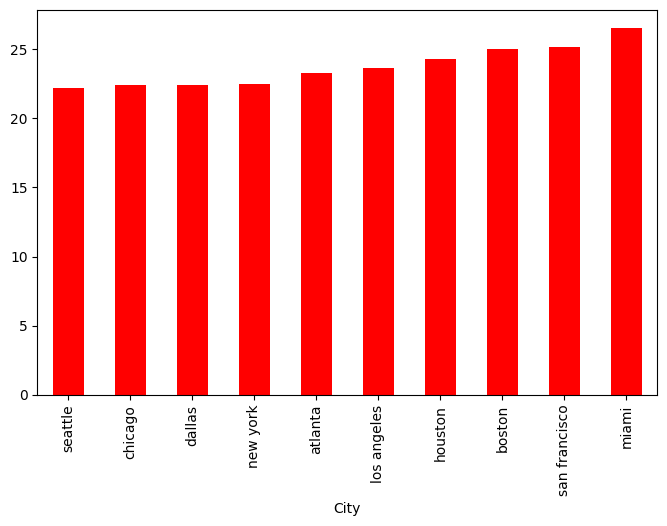

In [374]:
city_loss=df.groupby("City")["Profit"].mean().sort_values().head(10)
fig, ax=plt.subplots(figsize=(8,5))
city_loss.plot(kind="bar", ax=ax, color="red")
plt.show()
save_plot(fig, "Low Profit Cities", "Reduce marketing in loss-making cities")


 15. Payment Method & Basket Size


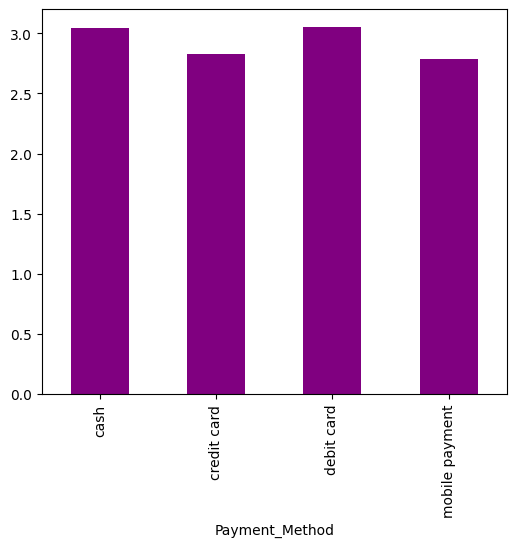

In [375]:
pay_basket=df.groupby("Payment_Method")["Basket_Size"].mean()
fig, ax=plt.subplots(figsize=(6,5))
pay_basket.plot(kind="bar", ax=ax, color="purple")
plt.show()
save_plot(fig, "Basket Size by Payment Method", "Encourage preferred payment options")


16. High Return Products


In [376]:
if "Returns" in df.columns:
    return_loss=df.groupby("Sub_Category")["Returns"].sum().sort_values(ascending=False).head(10)
    fig, ax=plt.subplots(figsize=(8,5))
    return_loss.plot(kind="barh",ax=ax, color="brown")
    plt.show()
    save_plot(fig,"High Return Products", "Improve product quality or vendor selection")


17. VIP Customers


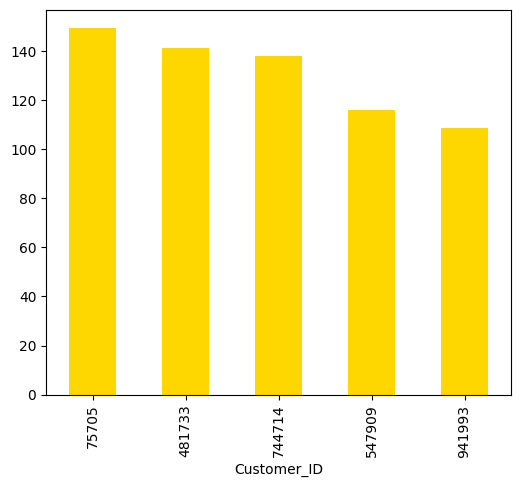

In [377]:
ig,ax=plt.subplots(figsize=(6,5))
top_customers=df.groupby("Customer_ID")["Total_Cost"].sum().nlargest(5)
top_customers.plot(kind="bar",ax=ax,color="gold")
plt.show()
save_plot(fig,"VIP Customers", "Offer loyalty programs or premium deals")


18. Profit by Product Category


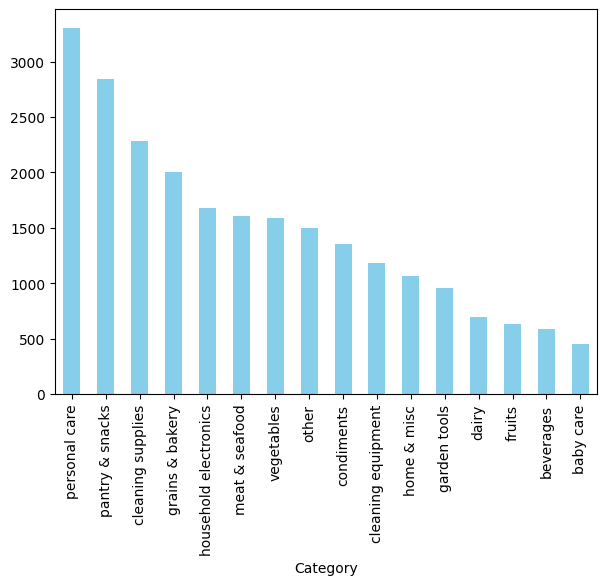

In [378]:
cat_profit=df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(7,5))
cat_profit.plot(kind="bar",ax=ax, color="skyblue")
plt.show()
save_plot(fig,"Profit by Category", "Focus inventory on top categories")


19. Month-on-Month Sales Trend

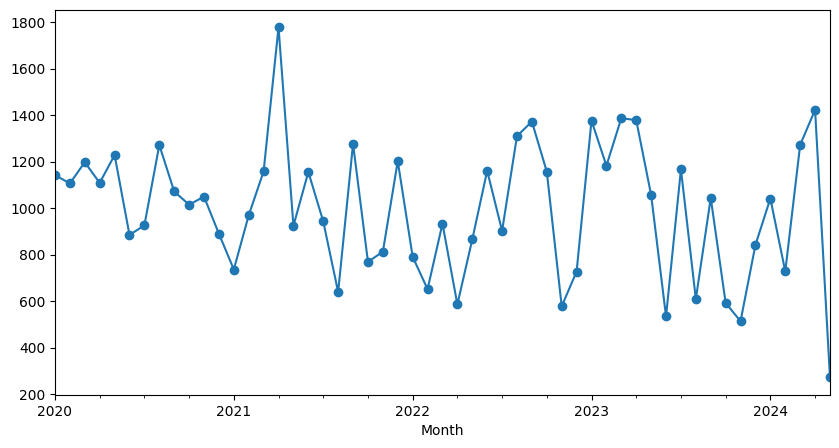

In [379]:

df["Month"]=df["Date"].dt.to_period("M")
monthly_sales=df.groupby("Month")["Total_Cost"].sum()
fig, ax=plt.subplots(figsize=(10,5))
monthly_sales.plot(kind="line",marker="o",ax=ax)
plt.show()
save_plot(fig,"Monthly Sales Trend","Plan budgets and inventory ahead")


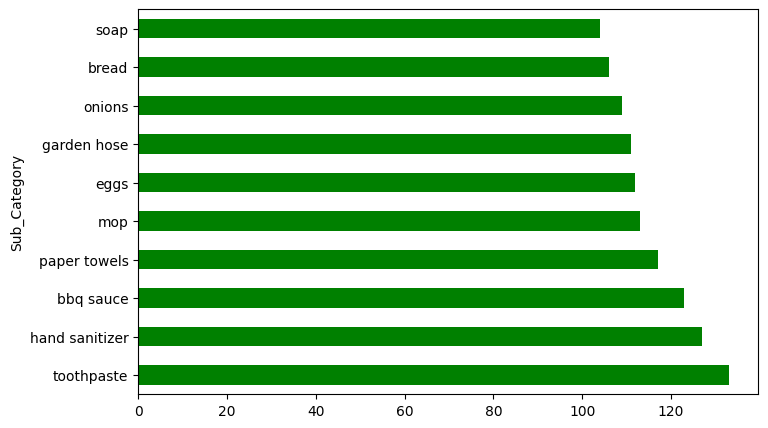

In [380]:
top_products=df.groupby("Sub_Category")["Total_Items"].sum().sort_values(ascending=False).head(10)
fig,ax=plt.subplots(figsize=(8,5))
top_products.plot(kind="barh",ax=ax,color="green")
plt.show()
save_plot(fig,"Top Selling Sub-Categories","Push these items in marketing campaigns")


# some statical function for deeper analysis

# Discriptivev Statistics

In [381]:
print("\n📊Descriptive Statistics:")
print(df[['Unit_Price','Total_Items','Basket_Size','Total_Cost','Profit']].describe())
print("\nInsight: Average profit and cost values help understand pricing margins. High std.dev may indicate inconsistent pricing or profit leaks.\n")



📊Descriptive Statistics:
        Unit_Price  Total_Items  Basket_Size   Total_Cost       Profit
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     15.222388     5.603000     2.925000    52.718650    23.775680
std      17.406248     2.841384     1.396182    26.994907    13.098519
min       0.514000     1.000000     1.000000     5.090000     1.739112
25%       5.218875     3.000000     2.000000    30.807500    13.073077
50%       9.452708     6.000000     3.000000    52.490000    23.526724
75%      17.409375     8.000000     4.000000    74.902500    33.526537
max      99.160000    10.000000     5.000000    99.930000    58.832717

Insight: Average profit and cost values help understand pricing margins. High std.dev may indicate inconsistent pricing or profit leaks.



4.Correlation Matrix


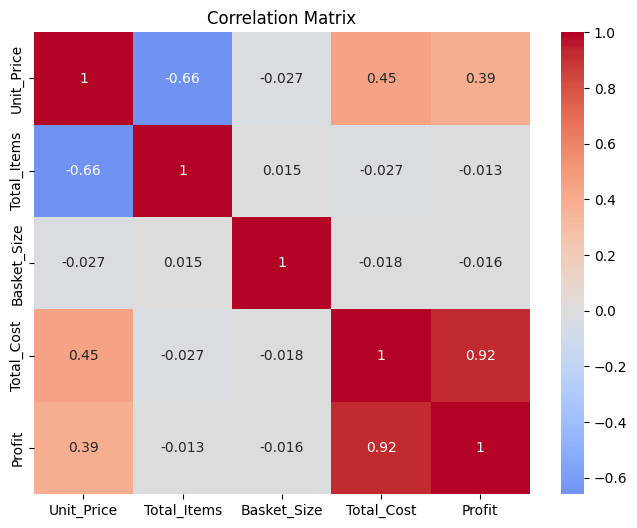

Insight:-Strong correlation between Basket_Size & Total_Cost means larger baskets directly raise revenue1 If Profit is weakly correlated,pricing strategy might need review




In [382]:
corr = df[['Unit_Price','Total_Items','Basket_Size','Total_Cost','Profit']].corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr,annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()
print("Insight:-Strong correlation between Basket_Size & Total_Cost means larger baskets directly raise revenue1","If Profit is weakly correlated,pricing strategy might need review")
save_plot(fig,"Correlation","matrix")

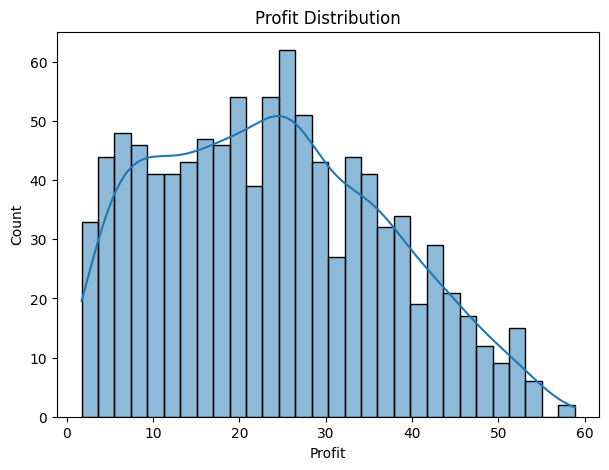




💡 Insight: Check for negative profits — if a long left tail exists, certain products or discounts may be loss-making.



In [383]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(df['Profit'], kde=True, bins=30)
plt.title("Profit Distribution")
plt.show()
save_plot(fig,"negative profits","loss marketing")
print("\n💡 Insight: Check for negative profits — if a long left tail exists, certain products or discounts may be loss-making.\n")



6. Outlier Detection (Boxplot)

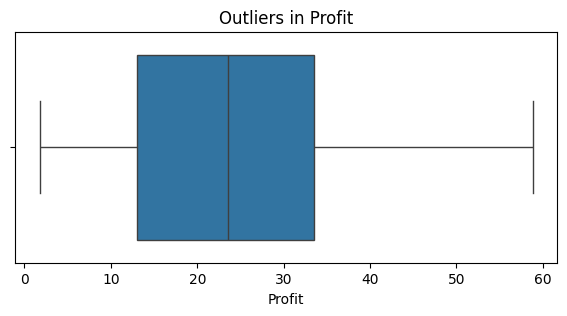


Insight: Outliers on the high side = best-selling big orders. Outliers on low/negative side = problematic transactions.





In [384]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Profit'])
plt.title("Outliers in Profit")
plt.show()
print("\nInsight: Outliers on the high side = best-selling big orders. Outliers on low/negative side = problematic transactions.\n")
save_plot(fig,"Outliers in profit","identify and address")

7.Seasonal Sales Analysi


Average Sales by Season:
Season
summer    55.496759
fall      52.242840
winter    52.203796
spring    51.387747
Name: Total_Cost, dtype: float64


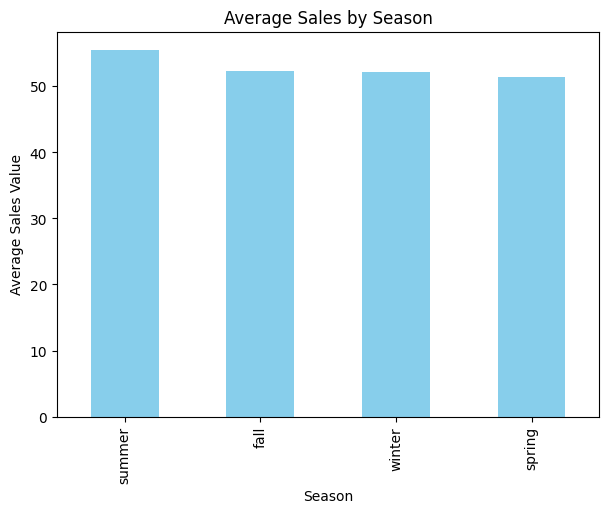


Insight: The top season is your best selling period → plan inventory, staffing, and promotions around it.





In [385]:
if 'Season' in df.columns:
    season_sales = df.groupby("Season")["Total_Cost"].mean().sort_values(ascending=False)
    print("\nAverage Sales by Season:")
    print(season_sales)
    fig, ax=plt.subplots(figsize=(7,5))
    season_sales.plot(kind="bar", color="skyblue")
    plt.title("Average Sales by Season")
    plt.ylabel("Average Sales Value")
    plt.show()
    print("\nInsight: The top season is your best selling period → plan inventory, staffing, and promotions around it.\n")
    save_plot(fig,"selling period","promotion around")

Customer Segmentation (RFM Basics)


In [387]:
if 'Customer_ID' in df.columns and 'Transaction_ID' in df.columns:
    rfm = df.groupby("Customer_ID").agg(Frequency=("Transaction_ID", "count"), Monetary=("Total_Cost", "sum")).reset_index()
    print("\nCustomer RFM Summary (top 5):")
    print(rfm.head())
    print("\n💡 Insight: Customers with highest Frequency + Monetary are VIPs. Retain them with loyalty programs.\n")
else:
    print("Required columns not found in the DataFrame.")


Customer RFM Summary (top 5):
   Customer_ID  Frequency  Monetary
0          522          1     65.71
1         1785          1     45.68
2         1842          1     31.76
3         2686          1     56.80
4         4075          1     34.93

💡 Insight: Customers with highest Frequency + Monetary are VIPs. Retain them with loyalty programs.

